In [35]:
import pandas as pd
import numpy as np


wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [30]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [36]:
data = wine[['alcohol', 'sugar', 'pH']]

In [37]:
target = wine['class']

In [8]:
from sklearn.model_selection import train_test_split  

train_input, test_input, train_target, test_target = train_test_split( data, target, test_size=0.2, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_input, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7602462959399654
0.7438461538461538


/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
print(lr.coef_, lr.intercept_)

[[ 0.4270427   0.35107217 -4.06298437]] [8.48363274]


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42 )
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


[Text(0.6076222132082433, 0.9772727272727273, 'x[1] <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.2956869355618141, 0.9318181818181818, 'x[1] <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.45165457438502865, 0.9545454545454546, 'True  '),
 Text(0.05751066521865647, 0.8863636363636364, 'x[1] <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.006651147322913203, 0.8409090909090909, 'x[2] <= 3.966\ngini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.005320917858330562, 0.7954545454545454, 'x[2] <= -2.017\ngini = 0.025\nsamples = 553\nvalue = [7, 546]'),
 Text(0.002660458929165281, 0.75, 'x[2] <= -2.08\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.0013302294645826404, 0.7045454545454546, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.0039906883937479215, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.007981376787495843, 0.75, 'x[1] <= -0.896\ngini = 0.022\nsamples = 545\nvalu

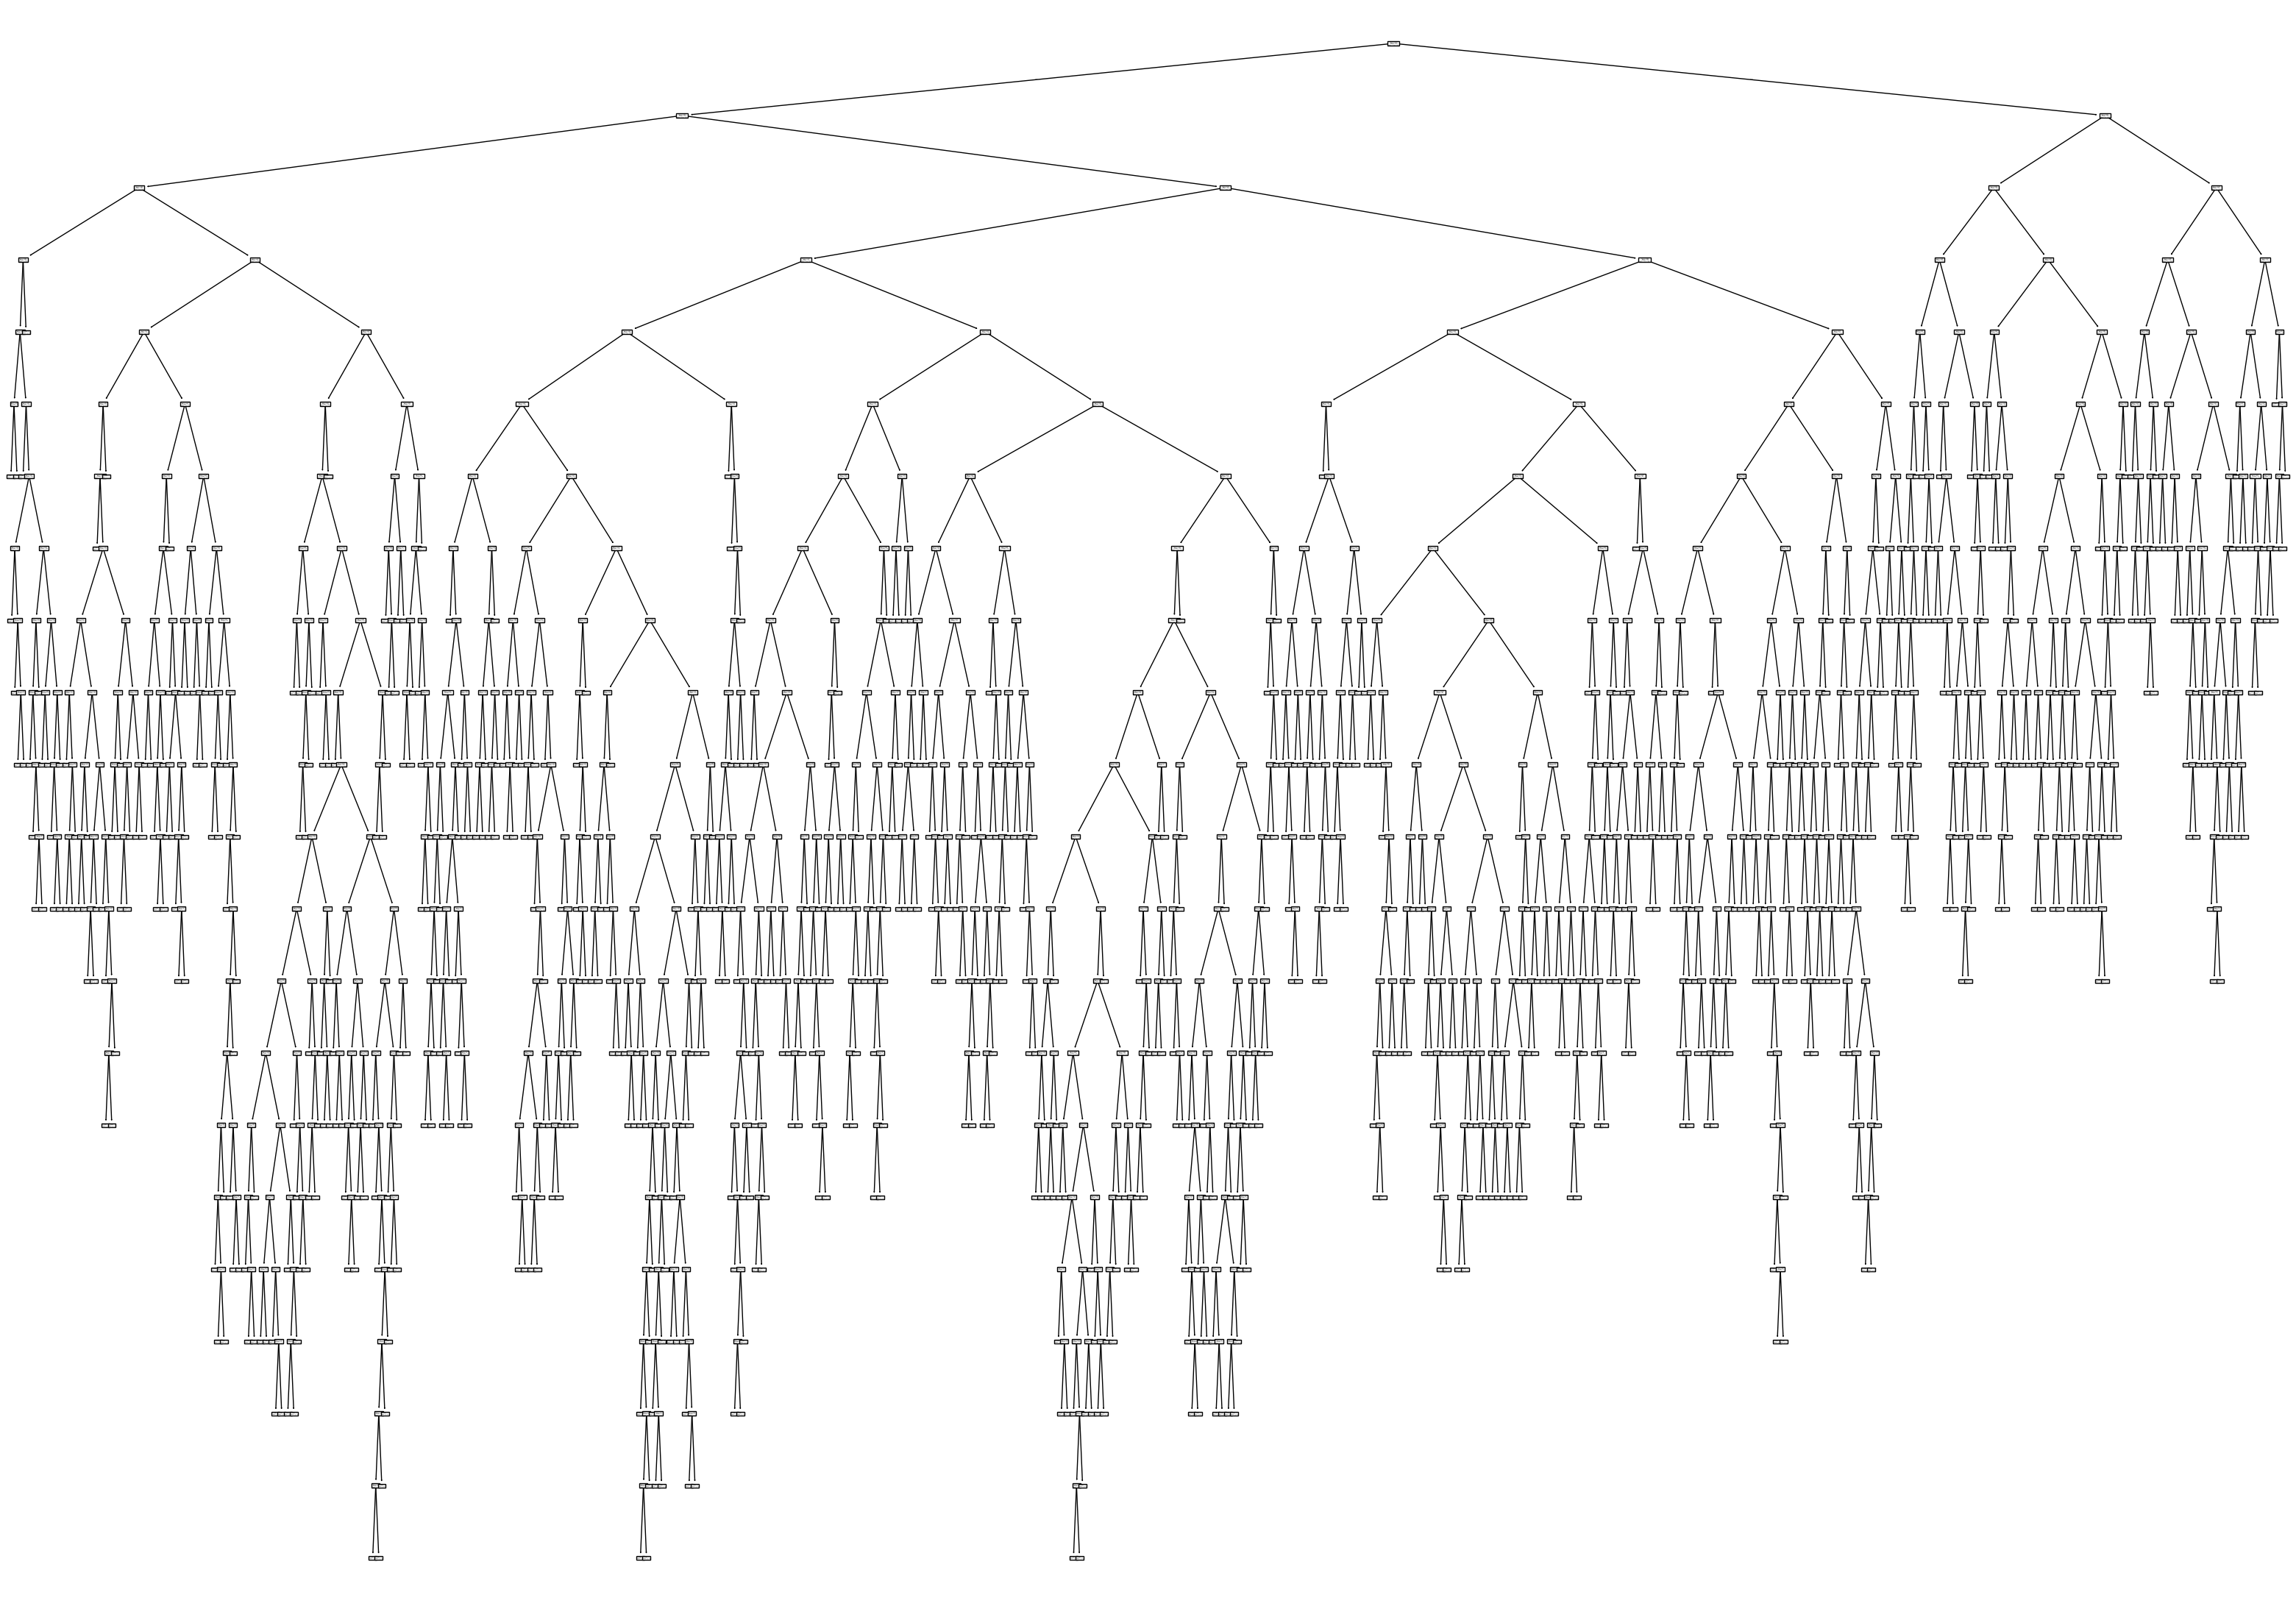

In [19]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize = (40,28))

plot_tree(dt)


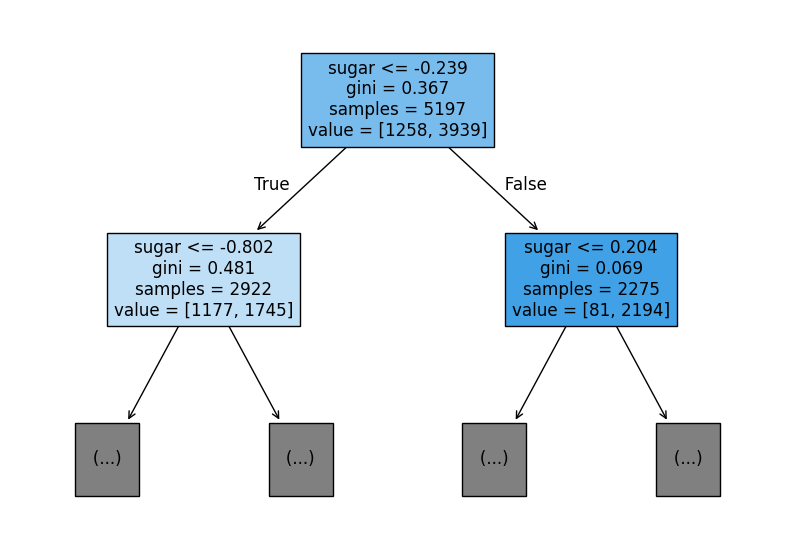

In [20]:
plt.figure(figsize = (10,7))

plot_tree(dt, max_depth=1, filled= True,
          feature_names=['alchol', 'sugar', 'pH'])

plt.show()

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
 
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


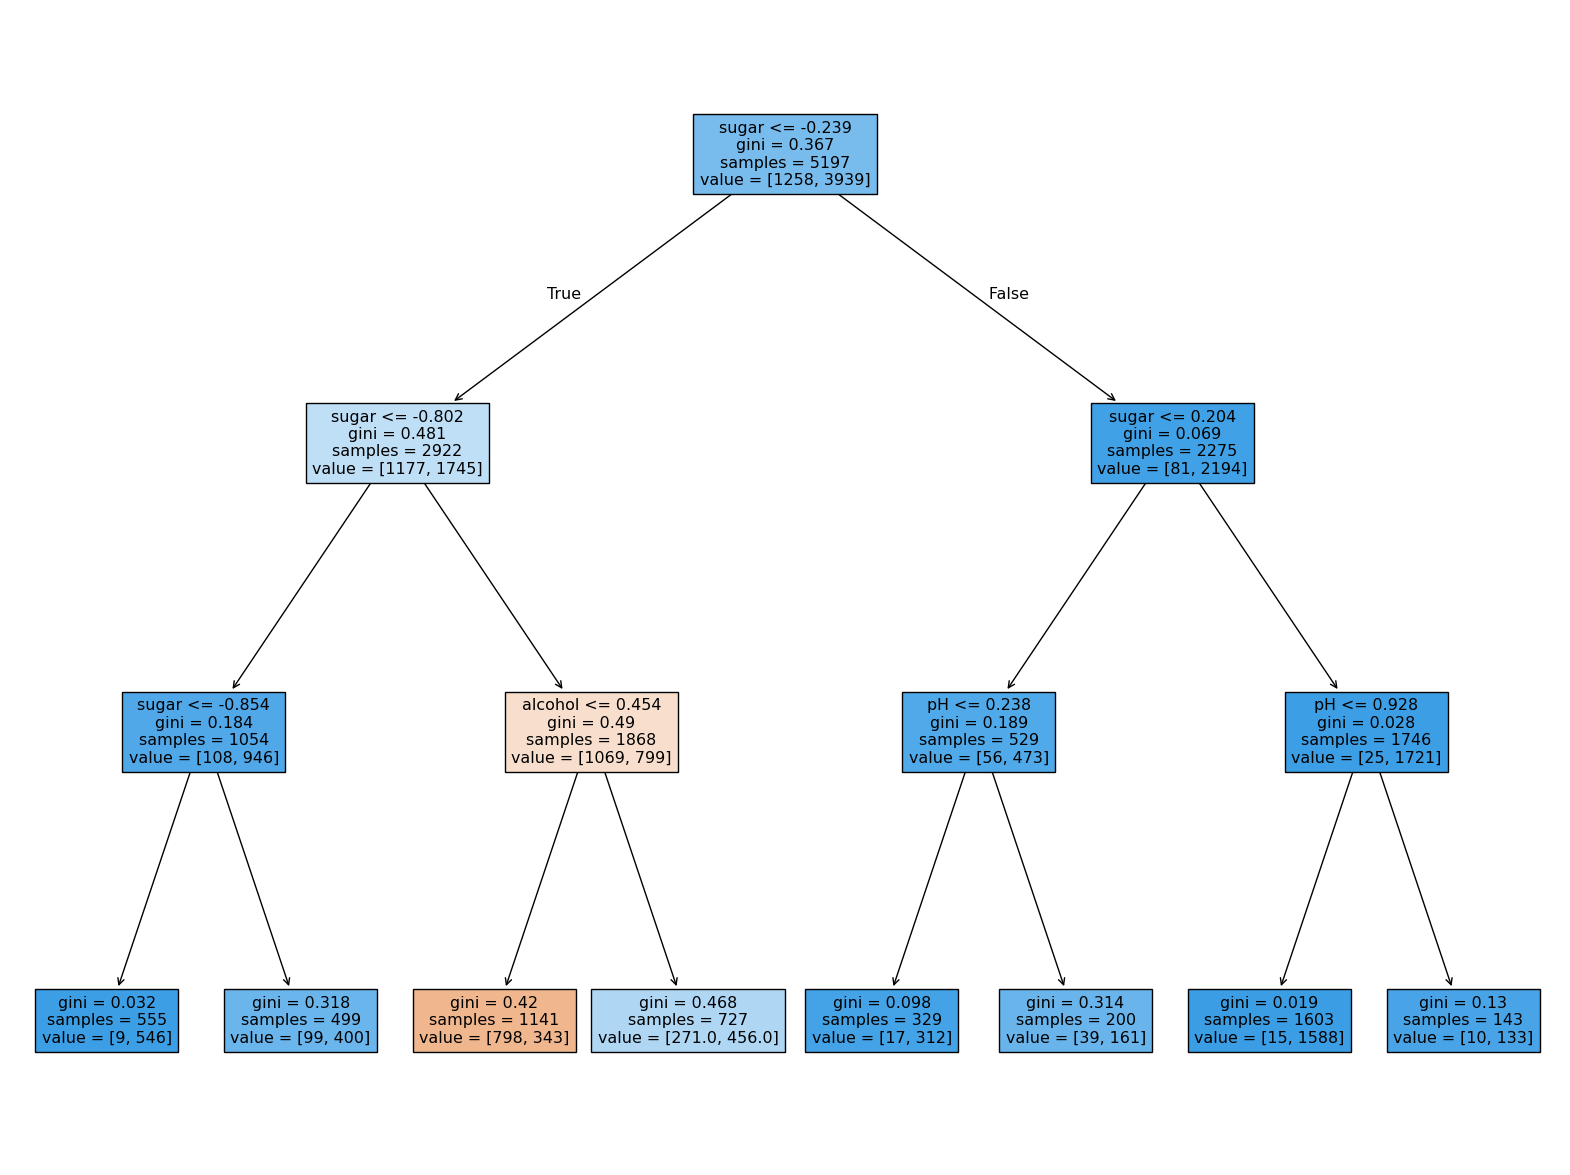

In [22]:
plt.figure(figsize = (20, 15))

plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [31]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [41]:
train_input, test_input, train_target, test_target =train_test_split(
    data, target, test_size = 0.2, random_state=42
)

In [42]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state=42
)

In [43]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [44]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(sub_input, sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [45]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)

print(scores)

{'fit_time': array([0.0089047 , 0.00994968, 0.0079236 , 0.00937557, 0.00787544]), 'score_time': array([0.00342917, 0.0034585 , 0.00251961, 0.00255704, 0.00244474]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [46]:
print(np.mean(scores['test_score']))

0.855300214703487


In [47]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())


print(np.mean(scores['test_score']))

0.855300214703487


In [48]:
splitter = StratifiedKFold(n_splits = 10, shuffle= True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)

print(np.mean(scores['test_score']))

0.8574181117533719


In [56]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [57]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)

In [58]:
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [59]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [60]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [61]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [64]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [65]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': range(5, 20), 'min_impurity_decrease': array([0.0001... 0.0009]), 'min_samples_split': range(2, 100, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [66]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [67]:
from scipy.stats import uniform, randint

In [71]:
rgen = randint(0, 10)

rgen.rvs(10)

array([9, 1, 9, 8, 1, 0, 9, 7, 7, 0])

In [72]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([108, 104,  94,  83, 110, 100,  98, 105,  90, 108]))

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)


{'min_samples_split': 12, 'min_impurity_decrease': np.float64(0.0005), 'max_depth': 11}
0.8681935292811135
0.8615384615384616


In [83]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42 , splitter='random'), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

print(gs.best_params_)



{'min_samples_split': 32, 'min_impurity_decrease': np.float64(0.0001), 'max_depth': 15}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8535701858295699


In [76]:

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.8615384615384616


In [86]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

print(gs.best_params_)


{'min_samples_split': 12, 'min_impurity_decrease': np.float64(0.0005), 'max_depth': 11}


In [87]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8681935292811135


In [89]:

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.8615384615384616


In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [91]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [92]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [93]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [94]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [95]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42)

scores = cross_validate(gb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [98]:

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
                                random_state=42)

scores = cross_validate(gb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [99]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


In [100]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


In [103]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, test_input, test_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [104]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)

result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [105]:
hgb.score(test_input, test_target)

0.8723076923076923

In [109]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method = 'hist', raondom_state = 42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [19:24:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "raondom_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [19:24:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "raondom_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [19:24:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "raondom_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9567059184812372 0.8783915747390243


/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [19:24:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "raondom_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [19:24:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "raondom_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [111]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Number of positive: 3152, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.758057 -> initscore=1.142055
[LightGBM] [Info] Start training from score 1.142055
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757999 -> initscore=1.141738
[LightGBM] [Info] Start training from score 1.141738
[LightGBM] [Info] Number o

/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have va

0.935828414851749 0.8801251203079884


/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/tjdals/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
